In [2]:
pip install pyopenms

Note: you may need to restart the kernel to use updated packages.


sequence:  0
MYSWK
SK
FK
FGK
SK
EEK
EAK
HSGFFHSSK
K
EEQQNNQATAGEHDASITR
SSLDR
K
GTINPSNSSVVPVR
VSYDASSSTSTVR
DSNGGNSENTNSSQNLDETANIGSTGTPNDATSSSGMMTIK
VYNGDDFILPFPITSSEQILNK
LLASGVPPPHK
EISK
EVDALIAQLSR
VQIK
NQGPADEDLISSESAAK
FIPSTIMLPGSSTLNPLLYFTIEFDNTVATIEAEYGTIAKPGFNK
ISTFDVTR
K
LPYLK
IDVFAR
IPSILLPSK
TWQQEMGLQDEK
LQTIFDK
INSNQDIHLDSFHLPINLSFDSAASIR
LYNHHWITLDNGLGK
INISIDYKPSR
NKPLSIDDFDLLK
VIGK
GSFGK
VMQVR
K
K
DTQK
VYALK
AIR
K
SYIVSK
SEVTHTLAER
TVLAR
VDCPFIVPLK
FSFQSPEK
LYFVLAFINGGELFYHLQK
EGR
FDLSR
AR
FYTAELLCALDNLHK
LDVVYR
DLKPENILLDYQGHIALCDFGLCK
LNMK
DDDK
TDTFCGTPEYLAPELLLGLGYTK
AVDWWTLGVLLYEMLTGLPPYYDEDVPK
MYK
K
ILQEPLVFPDGFDR
DAK
DLLIGLLSR
DPTR
R
LGYNGADEIR
NHPFFSQLSWK
R
LLMK
GYIPPYKPAVSNSMDTSNFDEEFTR
EKPIDSVVDEYLSESVQK
QFGGWTYVGNEQLGSSMVQGR
SIR
73
Spectrum 1 of MYSWK has 7 peaks
Spectrum 1 of SK has 7 peaks
Spectrum 1 of FK has 7 peaks
Spectrum 1 of FGK has 7 peaks
Spectrum 1 of SK has 7 peaks
Spectrum 1 of EEK has 7 peaks
Spectrum 1 of EAK has 7 peaks
Spectrum 1 of HSGFFHSS

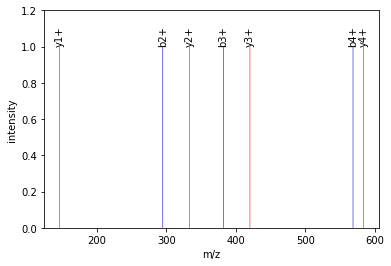

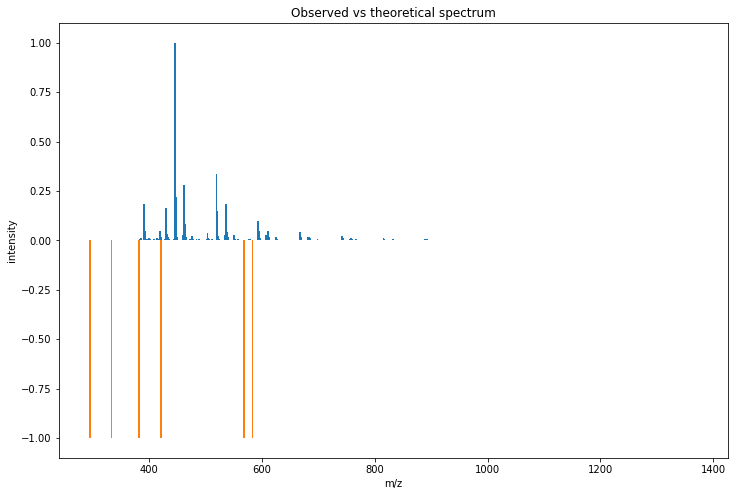

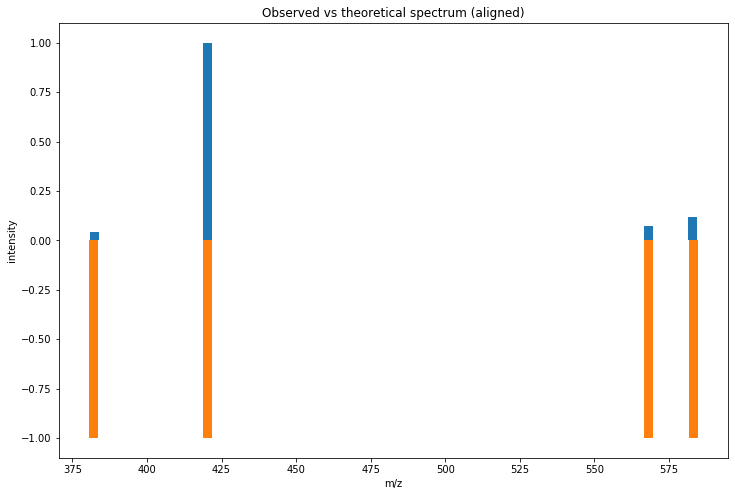

In [4]:
from pyopenms import *
import matplotlib.pyplot as plt
import numpy as np
dig = ProteaseDigestion()
dig.getEnzymeName()
entries=[]
f=FASTAFile()
f.load(r"C:\Users\EL10_gazy\Downloads\final fasta and trypsin for yeast.fasta",entries)
c=0
while c<len(entries)-1:
    f=AASequence.fromString(entries[c].sequence)
    print("sequence: ",c)
    result = []
    dig.digest(f, result)
    for e in result:
        print(e.toString())
    print(len(result)) 
    c=c+1
lis=[]
peptides=[AASequence.fromString(s.toString()) for s in result]
for peptide in peptides:
    tsg=TheoreticalSpectrumGenerator()
    spec1=MSSpectrum()
    p=Param()
    p.setValue("add_b_ions","true")
    p.setValue("add_y_ions","true")
    p.setValue("add_metainfo","true")
    tsg.setParameters(p)
    tsg.getSpectrum(spec1,peptide,1,1)
    lis.append(spec1)
    print("Spectrum 1 of",peptide,"has",lis[0].size(),"peaks")
for ion,peak in zip(lis[0].getStringDataArrays()[0],lis[0]):
    print(ion.decode(),"is generated at m/z",peak.getMZ())    
mz,i = lis[0].get_peaks() 
annot = lis[0].getStringDataArrays()[0] 
bars =plt.bar(lis[0].get_peaks()[0], lis[0].get_peaks()[1], snap=False,color=("r","b")) 
idx = 0 
for rect in bars: 
    height = rect.get_height() 
    plt.text(rect.get_x() + rect.get_width() / 2.0, height, annot[idx].decode(), ha='center', va='bottom', rotation=90) 
    idx += 1 
    plt.ylim(top=1.2) 
    plt.xlabel("m/z") 
    plt.ylabel("intensity")
from pyopenms import *
import matplotlib.pyplot as plt
import numpy as np
exp = MSExperiment()
MzMLFile().load(r"E:\Marwa\4th Year ( First Term )\Computational Biology Techniques\Project and Search\Fusion_180220_27.mzML", exp)
spectra = exp.getSpectra()
observed_spectrum = spectra[18]
import numpy as np
from matplotlib import pyplot as plt

def mirror_plot(obs_mz, obs_int, theo_mz, theo_int, title):
    obs_int = [element / max(obs_int) for element in obs_int] # relative intenstiy
    theo_int = [element * -1 for element in theo_int] # invert the intensity for the mirror plot
    plt.figure(figsize=(12,8))
    plt.bar(obs_mz, obs_int, width = 3.0)
    plt.bar(theo_mz, theo_int, width = 3.0)
    plt.title(title)
    plt.ylabel('intensity')
    plt.xlabel('m/z')
obs_mz, obs_int = observed_spectrum.get_peaks()

# The mass-to-charge of our observed spectrum ranges from 200 - 800 m/z
print(min(obs_mz)) # 212.012451171875
print(max(obs_mz)) # 795.2837524414062

# We filter the peaks of the theoretical spectrum to fit the range (to reduce image complexity)
theo_mz, theo_int = [], []
for mz, intensity in zip(*lis[0].get_peaks()):
    if mz >= 200.0 and mz <= 800.0:
        theo_mz.append(mz)
        theo_int.append(intensity)

title = 'Observed vs theoretical spectrum'
mirror_plot(obs_mz, obs_int, theo_mz, theo_int, title)
alignment = []
spa = SpectrumAlignment()
p = spa.getParameters()
# use 0.5 Da tolerance (Note: for high-resolution data we could also use ppm by setting the is_relative_tolerance value to true)
p.setValue("tolerance", 0.5)
p.setValue("is_relative_tolerance", "false")
spa.setParameters(p)
# align both spectra
spa.getSpectrumAlignment(alignment, lis[0], observed_spectrum)
print("Number of matched peaks: " + str(len(alignment)))
print("ion\ttheo. m/z\tobserved m/z")

for theo_idx, obs_idx in alignment:
    ion_name = lis[0].getStringDataArrays()[0][theo_idx].decode()
    ion_charge = lis[0].getIntegerDataArrays()[0][theo_idx]
    print(ion_name + "\t" + str(ion_charge) + "\t"
      + str(lis[0][theo_idx].getMZ())
      + "\t" + str(observed_spectrum[obs_idx].getMZ()))
theo_mz, theo_int, obs_mz, obs_int = [], [], [], []
for theo_idx, obs_idx in alignment:
    theo_mz.append(lis[0][theo_idx].getMZ())
    theo_int.append(lis[0][theo_idx].getIntensity())
    obs_mz.append(observed_spectrum[obs_idx].getMZ())
    obs_int.append(observed_spectrum[obs_idx].getIntensity())

title = 'Observed vs theoretical spectrum (aligned)'
mirror_plot(obs_mz, obs_int, theo_mz, theo_int, title)